## 📚 Importing Libraries and Setting Up Directories

In this section, we import essential Python libraries for data manipulation, analysis, and visualization. We also define directory paths for saving intermediate datasets and model artifacts.

In [1]:
# Core Libraries for Data Analysis
import pandas as pd
import numpy as np
import os

# Visualization Libraries
import seaborn as sns
from matplotlib import pyplot as plt

## 📥 Data Loading and Combining Tables

We load the Excel workbook that contains multiple sheets of customer-related data. These sheets will be merged into a unified dataset using common identifiers such as `Customer ID` or `Zip Code`.

In [2]:
excel_data = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name=None, index_col=0)

In [3]:
merged_df = pd.concat([df.reset_index(drop=True) for df in excel_data.values()], axis=1)

In [4]:
# Save as a single CSV
merged_df.to_csv("merged_customer_churn_data.csv", index=False, encoding='utf-8')

In [5]:
# Load the merged CSV file
data= pd.read_csv("merged_customer_churn_data.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   float64
 1   Gender            1000 non-null   object 
 2   MaritalStatus     1000 non-null   object 
 3   IncomeLevel       1000 non-null   object 
 4   TransactionID     5054 non-null   int64  
 5   TransactionDate   5054 non-null   object 
 6   AmountSpent       5054 non-null   float64
 7   ProductCategory   5054 non-null   object 
 8   InteractionID     1002 non-null   float64
 9   InteractionDate   1002 non-null   object 
 10  InteractionType   1002 non-null   object 
 11  ResolutionStatus  1002 non-null   object 
 12  LastLoginDate     1000 non-null   object 
 13  LoginFrequency    1000 non-null   float64
 14  ServiceUsage      1000 non-null   object 
 15  ChurnStatus       1000 non-null   float64
dtypes: float64(5), int64(1), object(10)
memory

## 🎯 Selecting Key Features Relevant to Churn Prediction

To ensure the dataset is focused on attributes that may influence customer churn, we filter it to include only critical variables. These cover customer demographics, transaction behavior, service interactions, and engagement metrics.


In [7]:
# Define key features related to customer demographics, transactions, and service interactions
relevant_columns = [
    "Age", "Gender", "MaritalStatus", "IncomeLevel",           # Demographics
    "TransactionDate", "AmountSpent", "ProductCategory",       # Transaction history
    "InteractionDate", "InteractionType", "ResolutionStatus",  # Customer service interactions
    "LastLoginDate", "LoginFrequency", "ServiceUsage",         # Engagement metrics
    "ChurnStatus"                                               # Target variable
]

# Filter the dataset to retain only the relevant columns
filtered_data = data[relevant_columns]


## 📄  A summary of the data sets selected and the rationale for their inclusion


## 📊 Exploratory Data Analysis (EDA)

In this stage, we conduct a thorough exploration of the dataset using both statistical summaries and visualizations. The goal is to understand variable distributions, detect anomalies, identify relationships between features, and uncover patterns that may influence customer churn.

Key steps include:
- Examining the distribution of numeric and categorical variables
- Identifying potential correlations or trends
- Visualizing churn rates across different customer segments
- Highlighting any unusual or missing data that requires attention

## 🧼 Data Cleaning and Preprocessing

To ensure the quality and consistency of our dataset, we applied several preprocessing steps. These transformations are essential to prepare the data for machine learning algorithms and to minimize bias or errors during model training.

Steps include:
- **Handling Missing Values**: Imputing, removing, or flagging missing entries based on context.
- **Outlier Detection and Treatment**: Identifying and addressing extreme values using statistical thresholds (e.g., IQR).
- **Feature Scaling**: Standardizing numerical features to ensure uniformity in model input.
- **Encoding Categorical Variables**: Transforming non-numeric features using techniques such as one-hot encoding or label encoding.


🔍 1. Basic Inspection

In [8]:
# Display the first few rows of the filtered data
filtered_data.head()


,Age,Gender,MaritalStatus,IncomeLevel,TransactionDate,AmountSpent,ProductCategory,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,62.0,M,Single,Low,2022-03-27,416.50,Electronics,2022-03-31,Inquiry,Resolved,2023-10-21,34.0,Mobile App,0.0
1,65.0,M,Married,Low,2022-08-08,54.96,Clothing,2022-03-17,Inquiry,Resolved,2023-12-05,5.0,Website,1.0
2,18.0,M,Single,Low,2022-07-25,197.50,Electronics,2022-08-24,Inquiry,Resolved,2023-11-15,3.0,Website,0.0
3,21.0,M,Widowed,Low,2022-01-25,101.31,Furniture,2022-11-18,Inquiry,Resolved,2023-08-25,2.0,Website,0.0
4,21.0,M,Divorced,Medium,2022-07-24,397.37,Clothing,2022-07-03,Inquiry,Unresolved,2023-10-27,41.0,Website,0.0


In [9]:
# Summary of the dataset
filtered_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   float64
 1   Gender            1000 non-null   object 
 2   MaritalStatus     1000 non-null   object 
 3   IncomeLevel       1000 non-null   object 
 4   TransactionDate   5054 non-null   object 
 5   AmountSpent       5054 non-null   float64
 6   ProductCategory   5054 non-null   object 
 7   InteractionDate   1002 non-null   object 
 8   InteractionType   1002 non-null   object 
 9   ResolutionStatus  1002 non-null   object 
 10  LastLoginDate     1000 non-null   object 
 11  LoginFrequency    1000 non-null   float64
 12  ServiceUsage      1000 non-null   object 
 13  ChurnStatus       1000 non-null   float64
dtypes: float64(4), object(10)
memory usage: 552.9+ KB


In [10]:
# Descriptive statistics for numerical features
filtered_data.describe()


,Age,AmountSpent,LoginFrequency,ChurnStatus
count,1000.000000,5054.000000,1000.000000,1000.000000
mean,43.267000,250.707351,25.912000,0.204000
std,15.242311,142.250838,14.055953,0.403171
min,18.000000,5.180000,1.000000,0.000000
25%,30.000000,127.105000,13.750000,0.000000
50%,43.000000,250.525000,27.000000,0.000000
75%,56.000000,373.412500,38.000000,0.000000
max,69.000000,499.860000,49.000000,1.000000


🧩 2. Missing Values Check

In [11]:
# Count missing values per column
filtered_data.isnull().sum()


Age                 4054
Gender              4054
MaritalStatus       4054
IncomeLevel         4054
TransactionDate        0
AmountSpent            0
ProductCategory        0
InteractionDate     4052
InteractionType     4052
ResolutionStatus    4052
LastLoginDate       4054
LoginFrequency      4054
ServiceUsage        4054
ChurnStatus         4054
dtype: int64

In [12]:

# Basic info and summary stats
print(filtered_data.info())
print(filtered_data.describe(include='all').T)
print(filtered_data['ChurnStatus'].value_counts())  # Target variable distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   float64
 1   Gender            1000 non-null   object 
 2   MaritalStatus     1000 non-null   object 
 3   IncomeLevel       1000 non-null   object 
 4   TransactionDate   5054 non-null   object 
 5   AmountSpent       5054 non-null   float64
 6   ProductCategory   5054 non-null   object 
 7   InteractionDate   1002 non-null   object 
 8   InteractionType   1002 non-null   object 
 9   ResolutionStatus  1002 non-null   object 
 10  LastLoginDate     1000 non-null   object 
 11  LoginFrequency    1000 non-null   float64
 12  ServiceUsage      1000 non-null   object 
 13  ChurnStatus       1000 non-null   float64
dtypes: float64(4), object(10)
memory usage: 552.9+ KB
None
                   count unique             top  freq        mean         std  \


📊 3. Distribution of Numerical Features

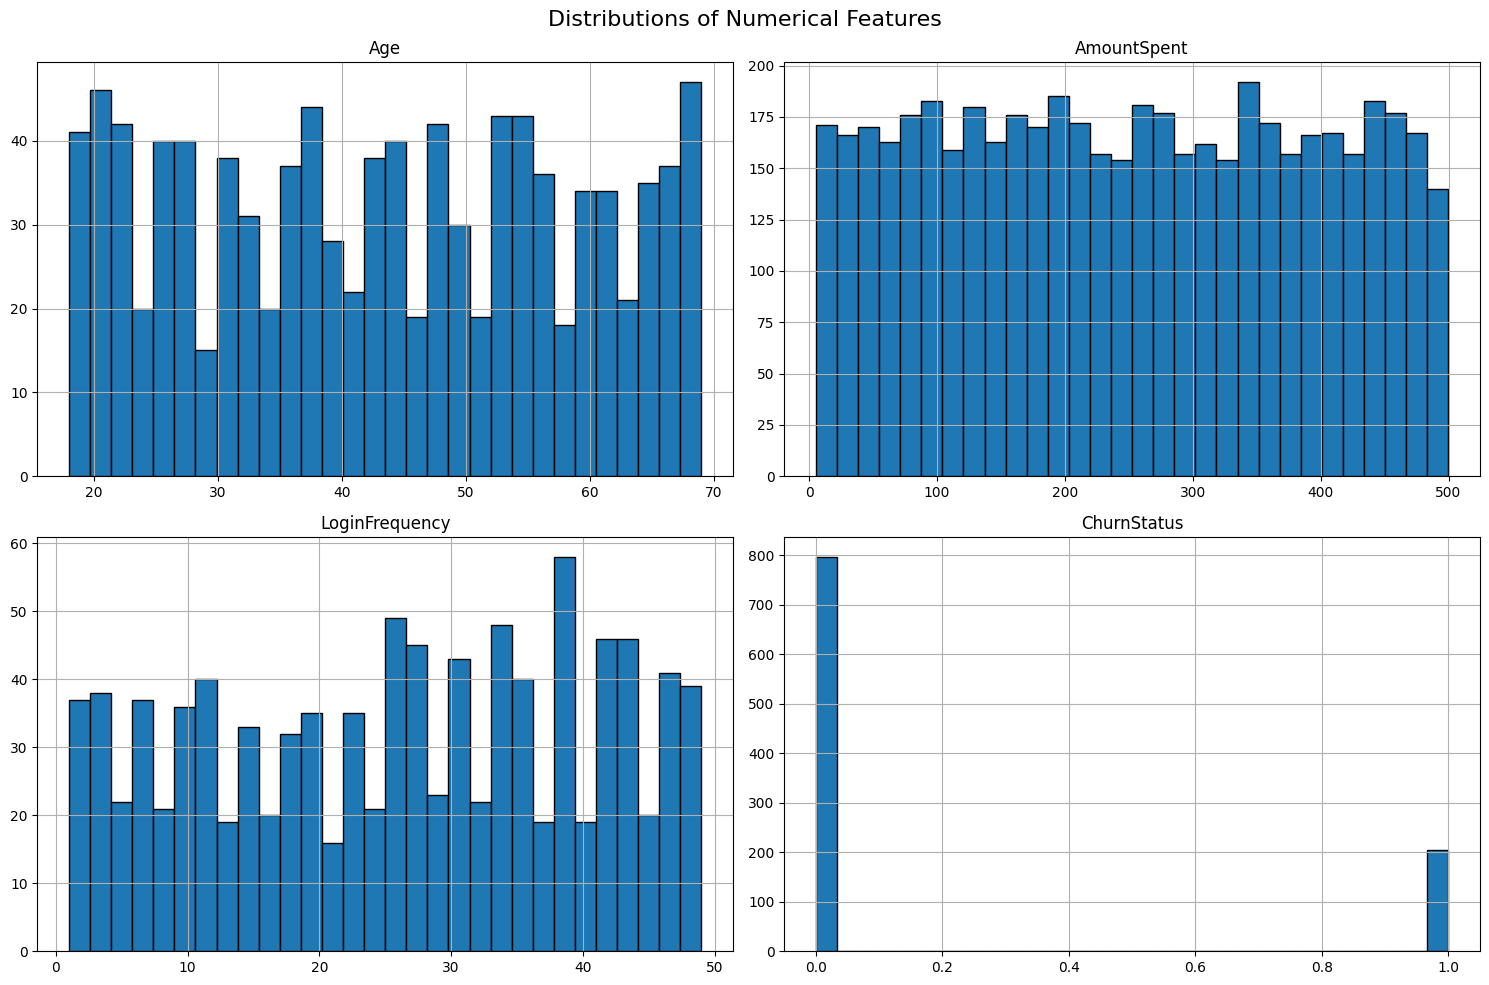

In [13]:
# Histograms for all numerical columns
filtered_data.select_dtypes(include=["float64", "int64"]).hist(
    bins=30, figsize=(15, 10), edgecolor='black'
)
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


📉 4. Churn Status Distribution

C:\Users\Sairam\AppData\Local\Temp\ipykernel_25036\1977915494.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, x="ChurnStatus", palette="Set2")


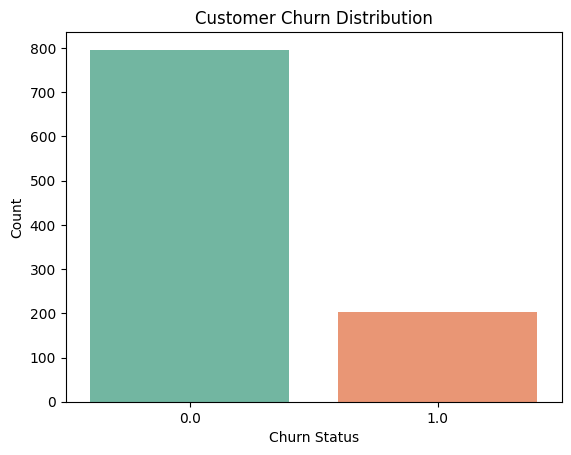

In [14]:
# Visualize churn vs. non-churn counts
sns.countplot(data=filtered_data, x="ChurnStatus", palette="Set2")
plt.title("Customer Churn Distribution")
plt.xlabel("Churn Status")
plt.ylabel("Count")
plt.show()


🧮 5. Correlation Heatmap (Numerical Features)

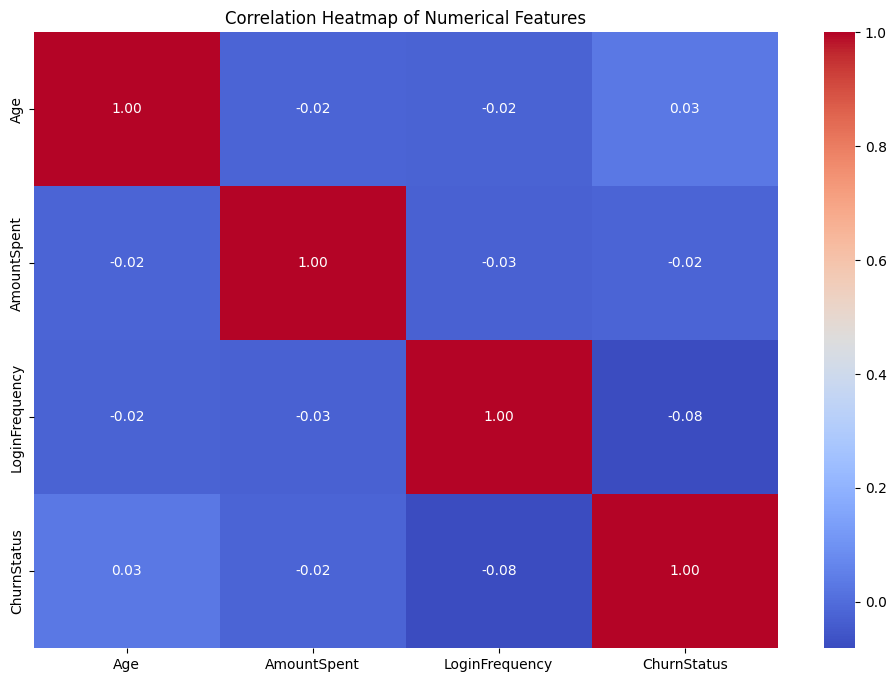

In [15]:
# Compute and plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


📦 6. Churn by Categorical Features

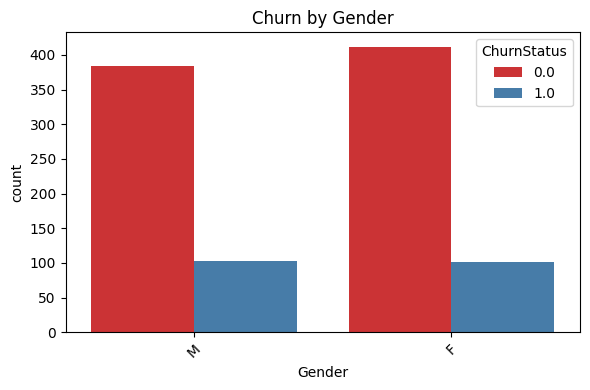

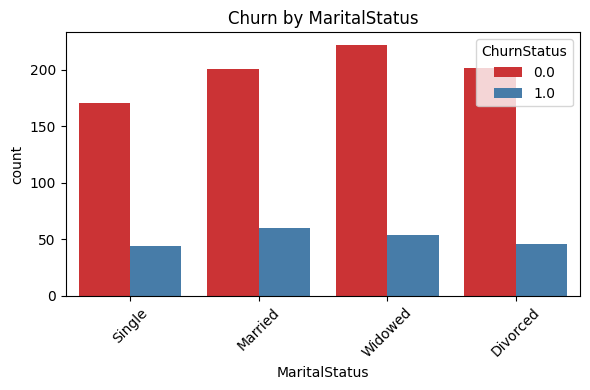

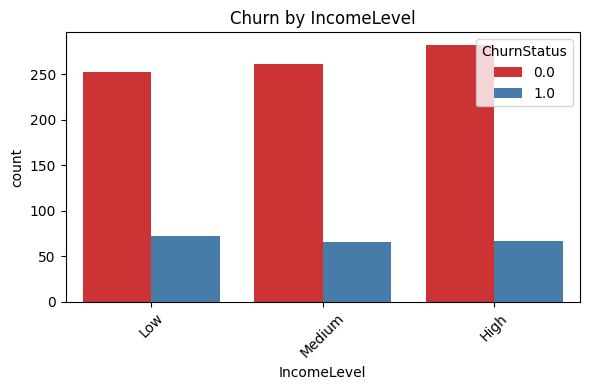

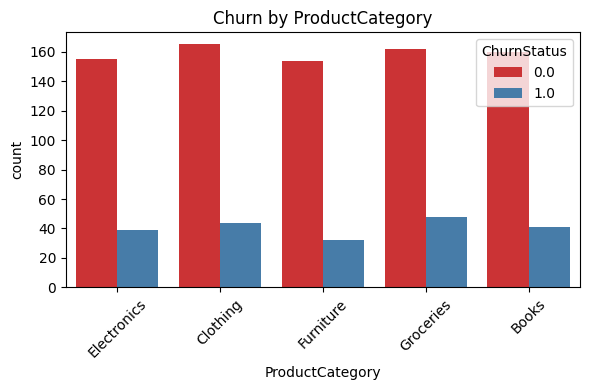

In [16]:
# Plot churn rate across selected categorical variables
categorical_cols = ["Gender", "MaritalStatus", "IncomeLevel", "ProductCategory"]

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=filtered_data, x=col, hue="ChurnStatus", palette="Set1")
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


🚨 7. Outlier Detection Using Boxplots

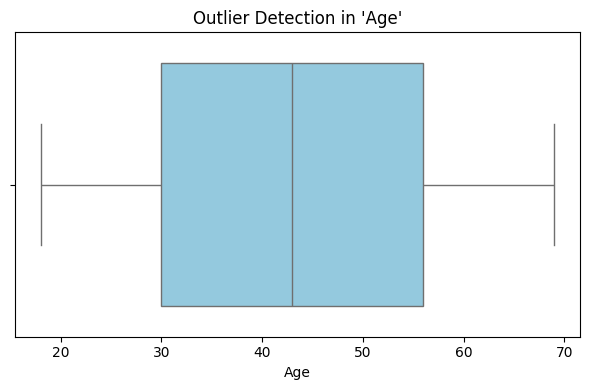

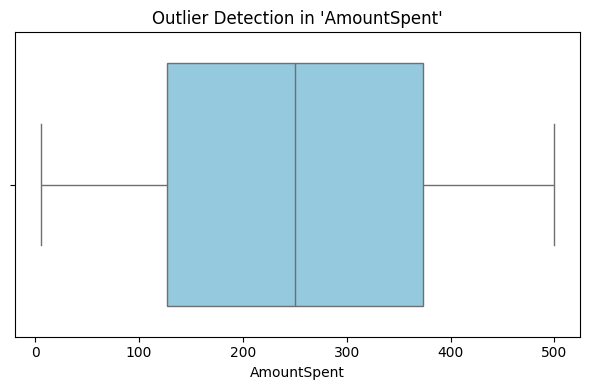

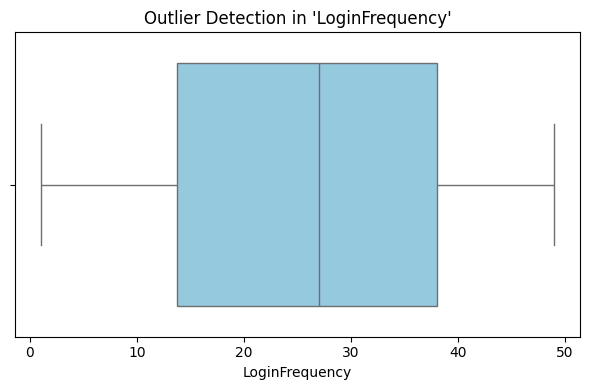

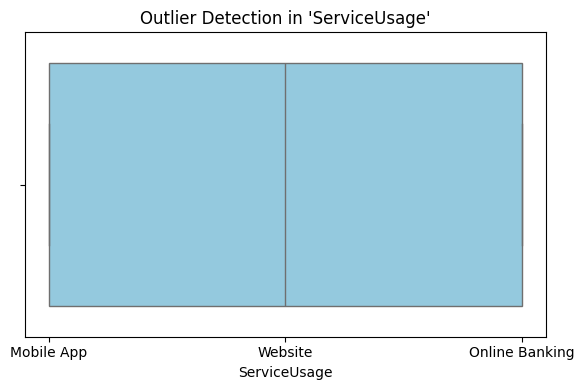

In [17]:
# Boxplots for key numerical features to detect outliers
numerical_cols = ["Age", "AmountSpent", "LoginFrequency", "ServiceUsage"]

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=filtered_data[col], color="skyblue")
    plt.title(f"Outlier Detection in '{col}'")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


🚨 We can decide whether to cap, remove, or transform these outliers based on the plots.



In [18]:
print(filtered_data[numerical_cols].apply(pd.to_numeric, errors='coerce').isna().sum())


Age               4054
AmountSpent          0
LoginFrequency    4054
ServiceUsage      5054
dtype: int64


🟦 9. Churn Rate by Category (Categorical Correlation)

C:\Users\Sairam\AppData\Local\Temp\ipykernel_25036\2551220155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="viridis")


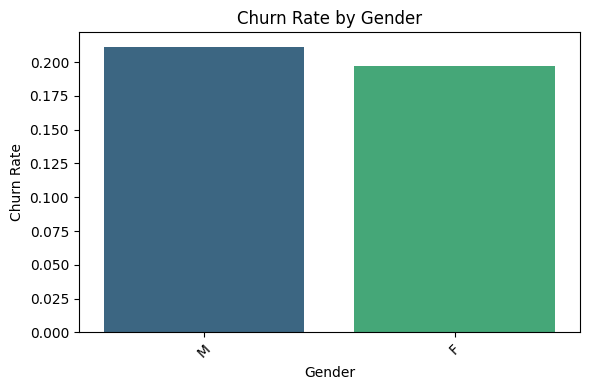

C:\Users\Sairam\AppData\Local\Temp\ipykernel_25036\2551220155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="viridis")


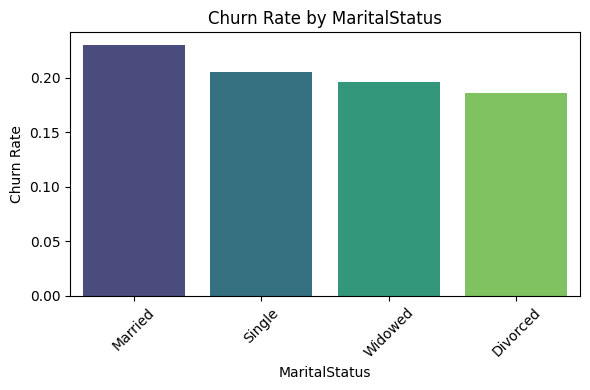

C:\Users\Sairam\AppData\Local\Temp\ipykernel_25036\2551220155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="viridis")


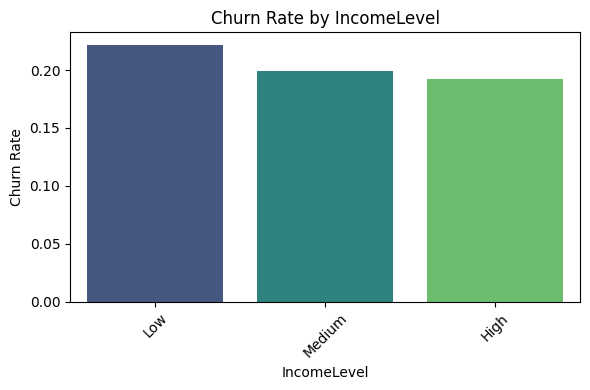

C:\Users\Sairam\AppData\Local\Temp\ipykernel_25036\2551220155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="viridis")


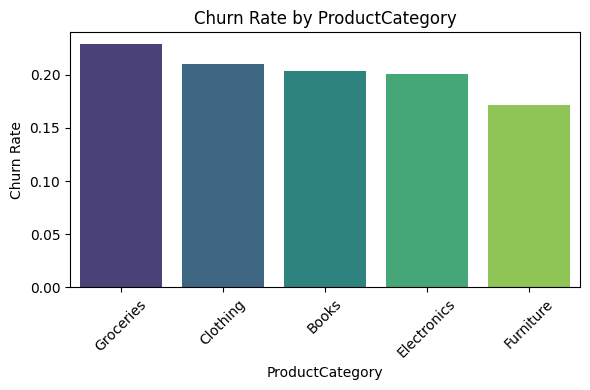

In [19]:
# Grouped churn rate by category for comparison
for col in categorical_cols:
    churn_rate = filtered_data.groupby(col)["ChurnStatus"].mean().sort_values(ascending=False)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="viridis")
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [20]:
filtered_data.isnull().sum()


Age                 4054
Gender              4054
MaritalStatus       4054
IncomeLevel         4054
TransactionDate        0
AmountSpent            0
ProductCategory        0
InteractionDate     4052
InteractionType     4052
ResolutionStatus    4052
LastLoginDate       4054
LoginFrequency      4054
ServiceUsage        4054
ChurnStatus         4054
dtype: int64

Key Features Influencing Customer Churn

## Visualizing Distributions (Histograms)

Histograms are an effective way to visualize the distribution of numerical data. They help you understand the underlying structure of the dataset, such as the spread, central tendency, skewness, and potential outliers. By plotting histograms for different numerical features, you can gain insights into their behavior.

### Why Use Histograms?

Histograms provide valuable information about:
- **Central Tendency**: The center of the data distribution (mean, median).
- **Skewness**: Whether the data is symmetrically distributed or skewed to the left or right.
- **Spread**: The range of data values.
- **Outliers**: Extreme values that deviate significantly from other observations.

C:\Users\Sairam\AppData\Local\Temp\ipykernel_25036\2647564366.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='ChurnStatus', y='LoginFrequency', ax=axes[1, 0], palette='muted')


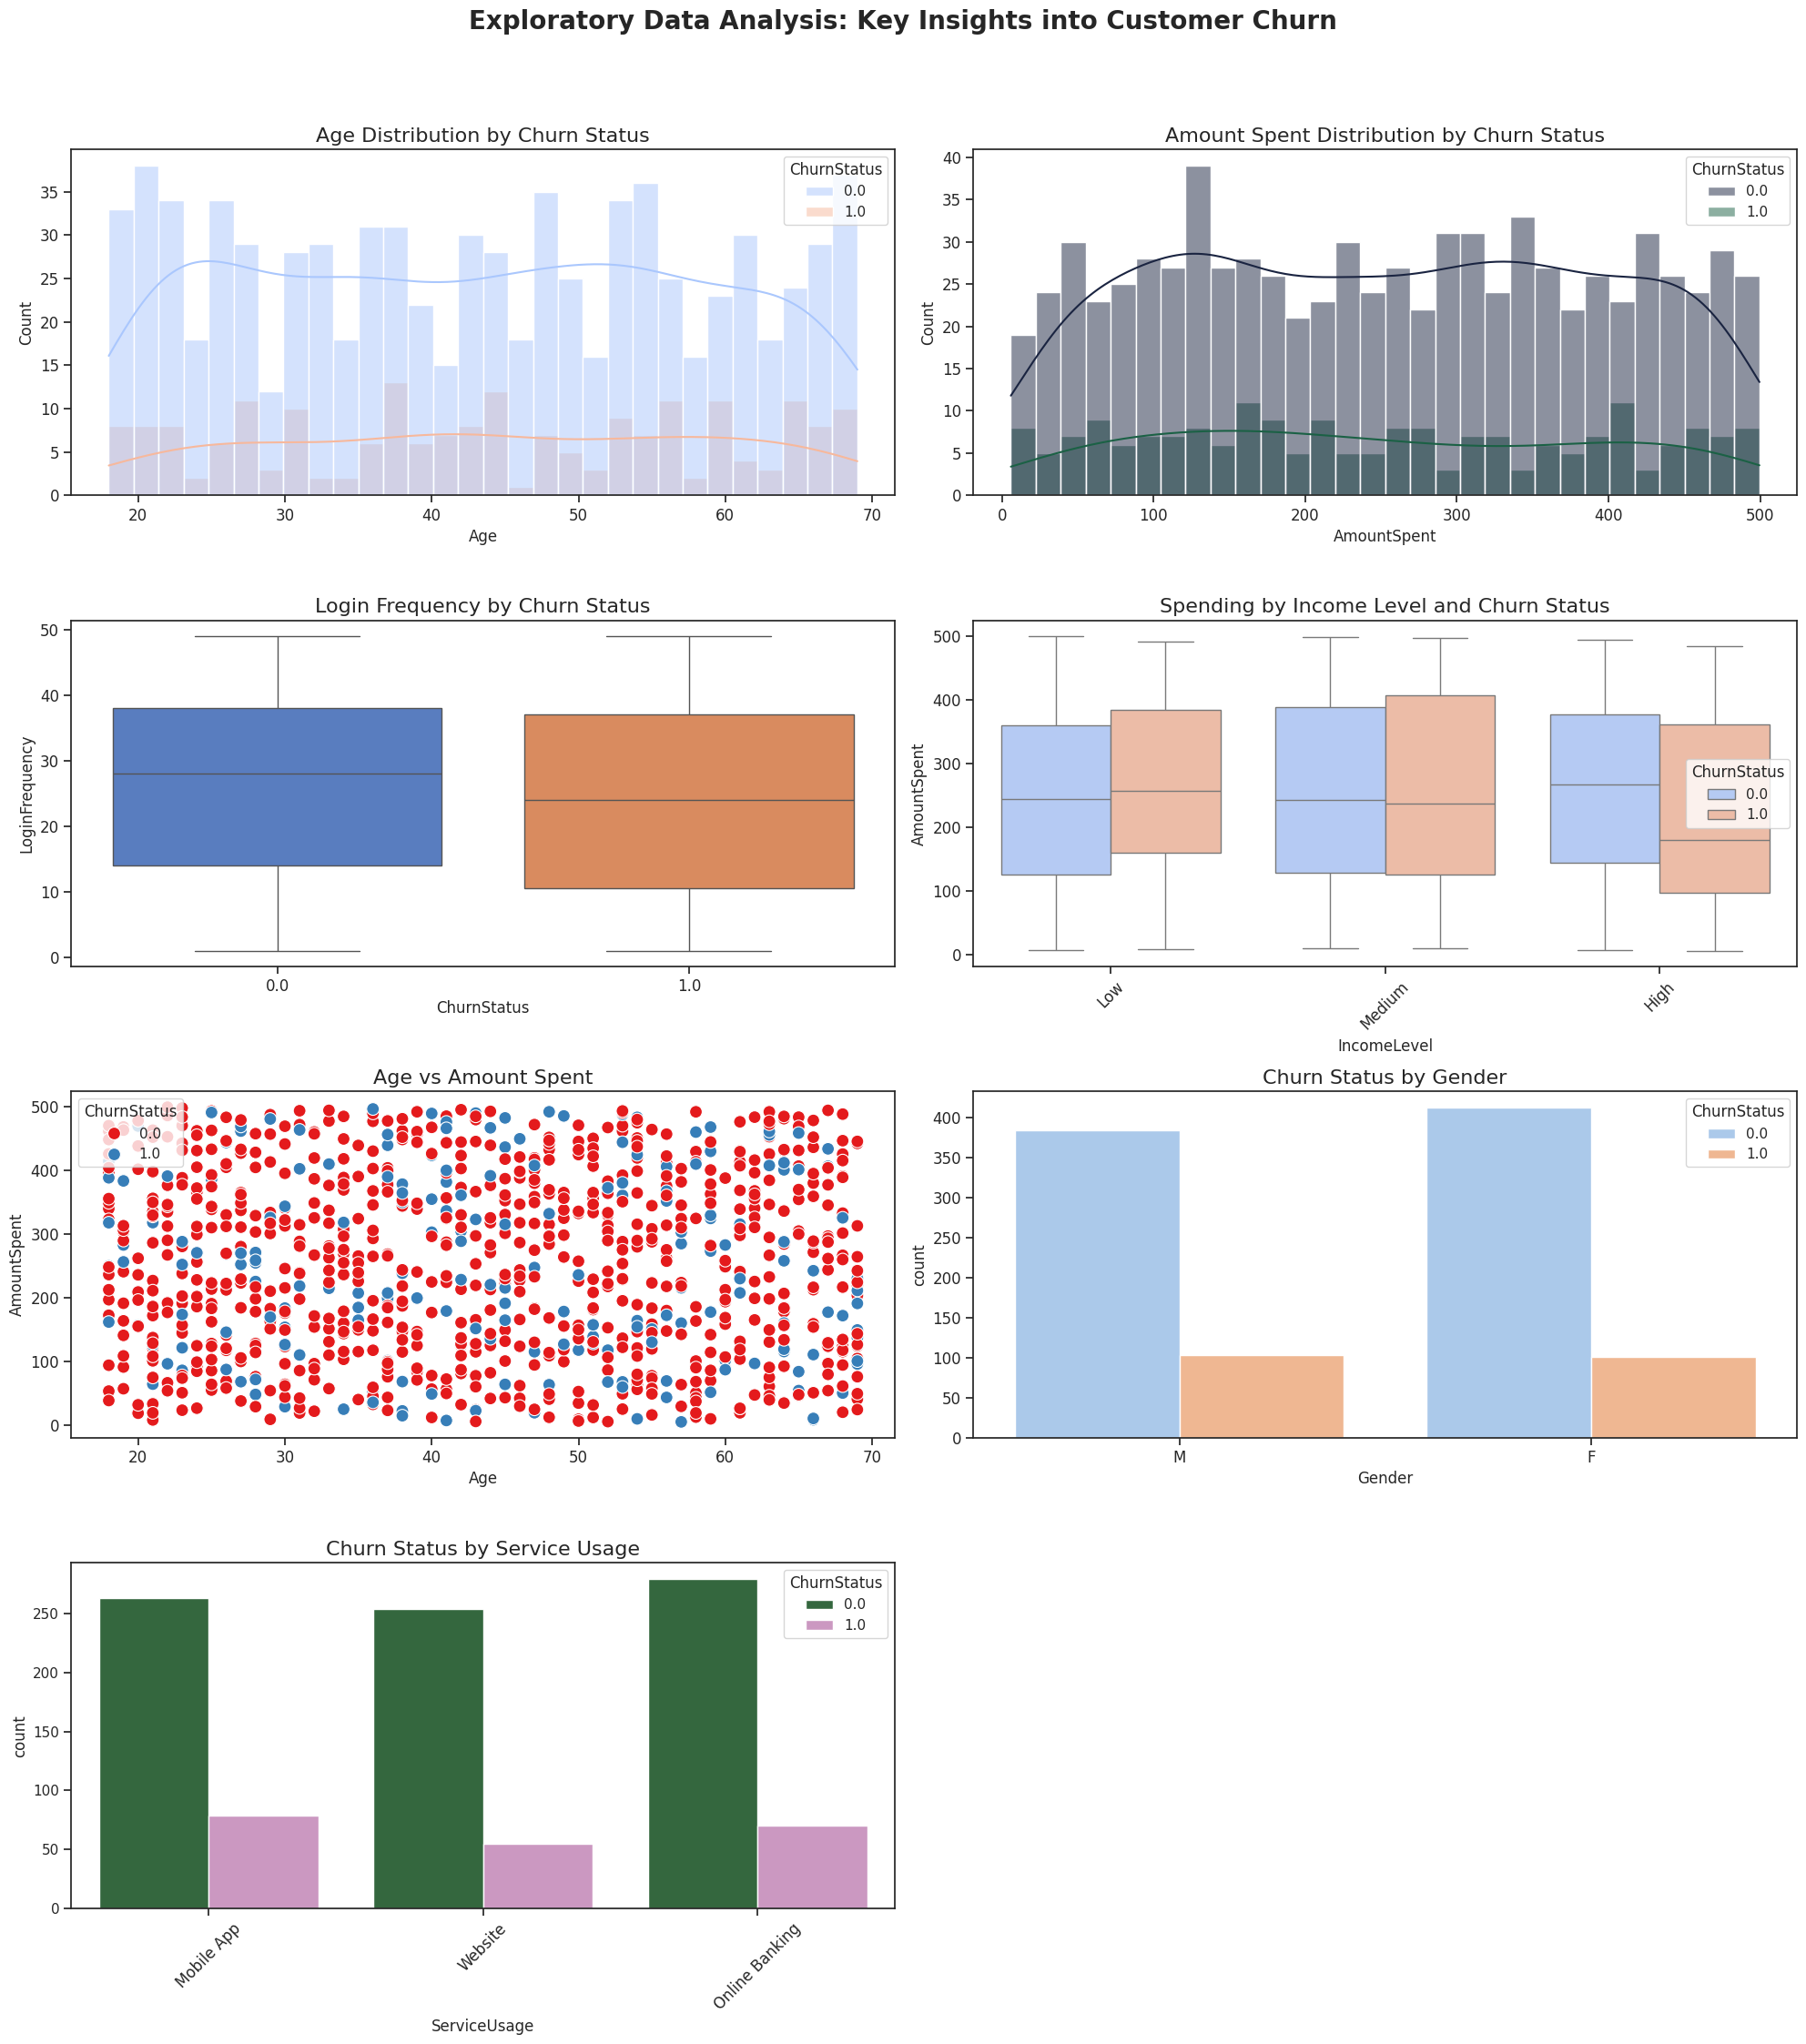

In [21]:
# Set Seaborn style and apply a sophisticated color palette with a modern font for better aesthetics
sns.set(style="ticks", palette="cubehelix", font="DejaVu Sans")

# Create a figure with 4 rows and 2 columns for subplots, adjusting the figure size for clarity and readability
fig, axes = plt.subplots(4, 2, figsize=(20, 22))
fig.suptitle('Exploratory Data Analysis: Key Insights into Customer Churn', fontsize=20, y=1.02, fontweight='bold')

# Visualizing the age distribution across different churn statuses
sns.histplot(data=filtered_data, x='Age', hue='ChurnStatus', kde=True, bins=30, ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title("Age Distribution by Churn Status", fontsize=16)
axes[0, 0].tick_params(axis='both', labelsize=12)

# Understanding the spending patterns based on churn status
sns.histplot(data=filtered_data, x='AmountSpent', hue='ChurnStatus', kde=True, bins=30, ax=axes[0, 1])
axes[0, 1].set_title("Amount Spent Distribution by Churn Status", fontsize=16)
axes[0, 1].tick_params(axis='both', labelsize=12)

# Analyzing login frequency variations based on whether the customer churned or not
sns.boxplot(data=filtered_data, x='ChurnStatus', y='LoginFrequency', ax=axes[1, 0], palette='muted')
axes[1, 0].set_title("Login Frequency by Churn Status", fontsize=16)
axes[1, 0].tick_params(axis='both', labelsize=12)

# Investigating spending behavior across different income levels and churn status
sns.boxplot(data=filtered_data, x='IncomeLevel', y='AmountSpent', hue='ChurnStatus', ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title("Spending by Income Level and Churn Status", fontsize=16)
axes[1, 1].tick_params(axis='both', labelsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

# Exploring the relationship between age and amount spent, segmented by churn status
sns.scatterplot(data=filtered_data, x='Age', y='AmountSpent', hue='ChurnStatus', ax=axes[2, 0], palette='Set1', s=100)
axes[2, 0].set_title("Age vs Amount Spent", fontsize=16)
axes[2, 0].tick_params(axis='both', labelsize=12)

# Comparing churn status by gender distribution
sns.countplot(data=filtered_data, x='Gender', hue='ChurnStatus', ax=axes[2, 1], palette='pastel')
axes[2, 1].set_title("Churn Status by Gender", fontsize=16)
axes[2, 1].tick_params(axis='both', labelsize=12)

# Analyzing churn status based on service usage, with clear differentiation between groups
sns.countplot(data=filtered_data, x='ServiceUsage', hue='ChurnStatus', ax=axes[3, 0], palette='cubehelix')
axes[3, 0].set_title("Churn Status by Service Usage", fontsize=16)
axes[3, 0].tick_params(axis='x', rotation=45, labelsize=12)

# Hiding the unused subplot (bottom-right) to maintain a neat layout
axes[3, 1].axis('off')

# Adjusting layout for better spacing and clarity, ensuring all titles are visible
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


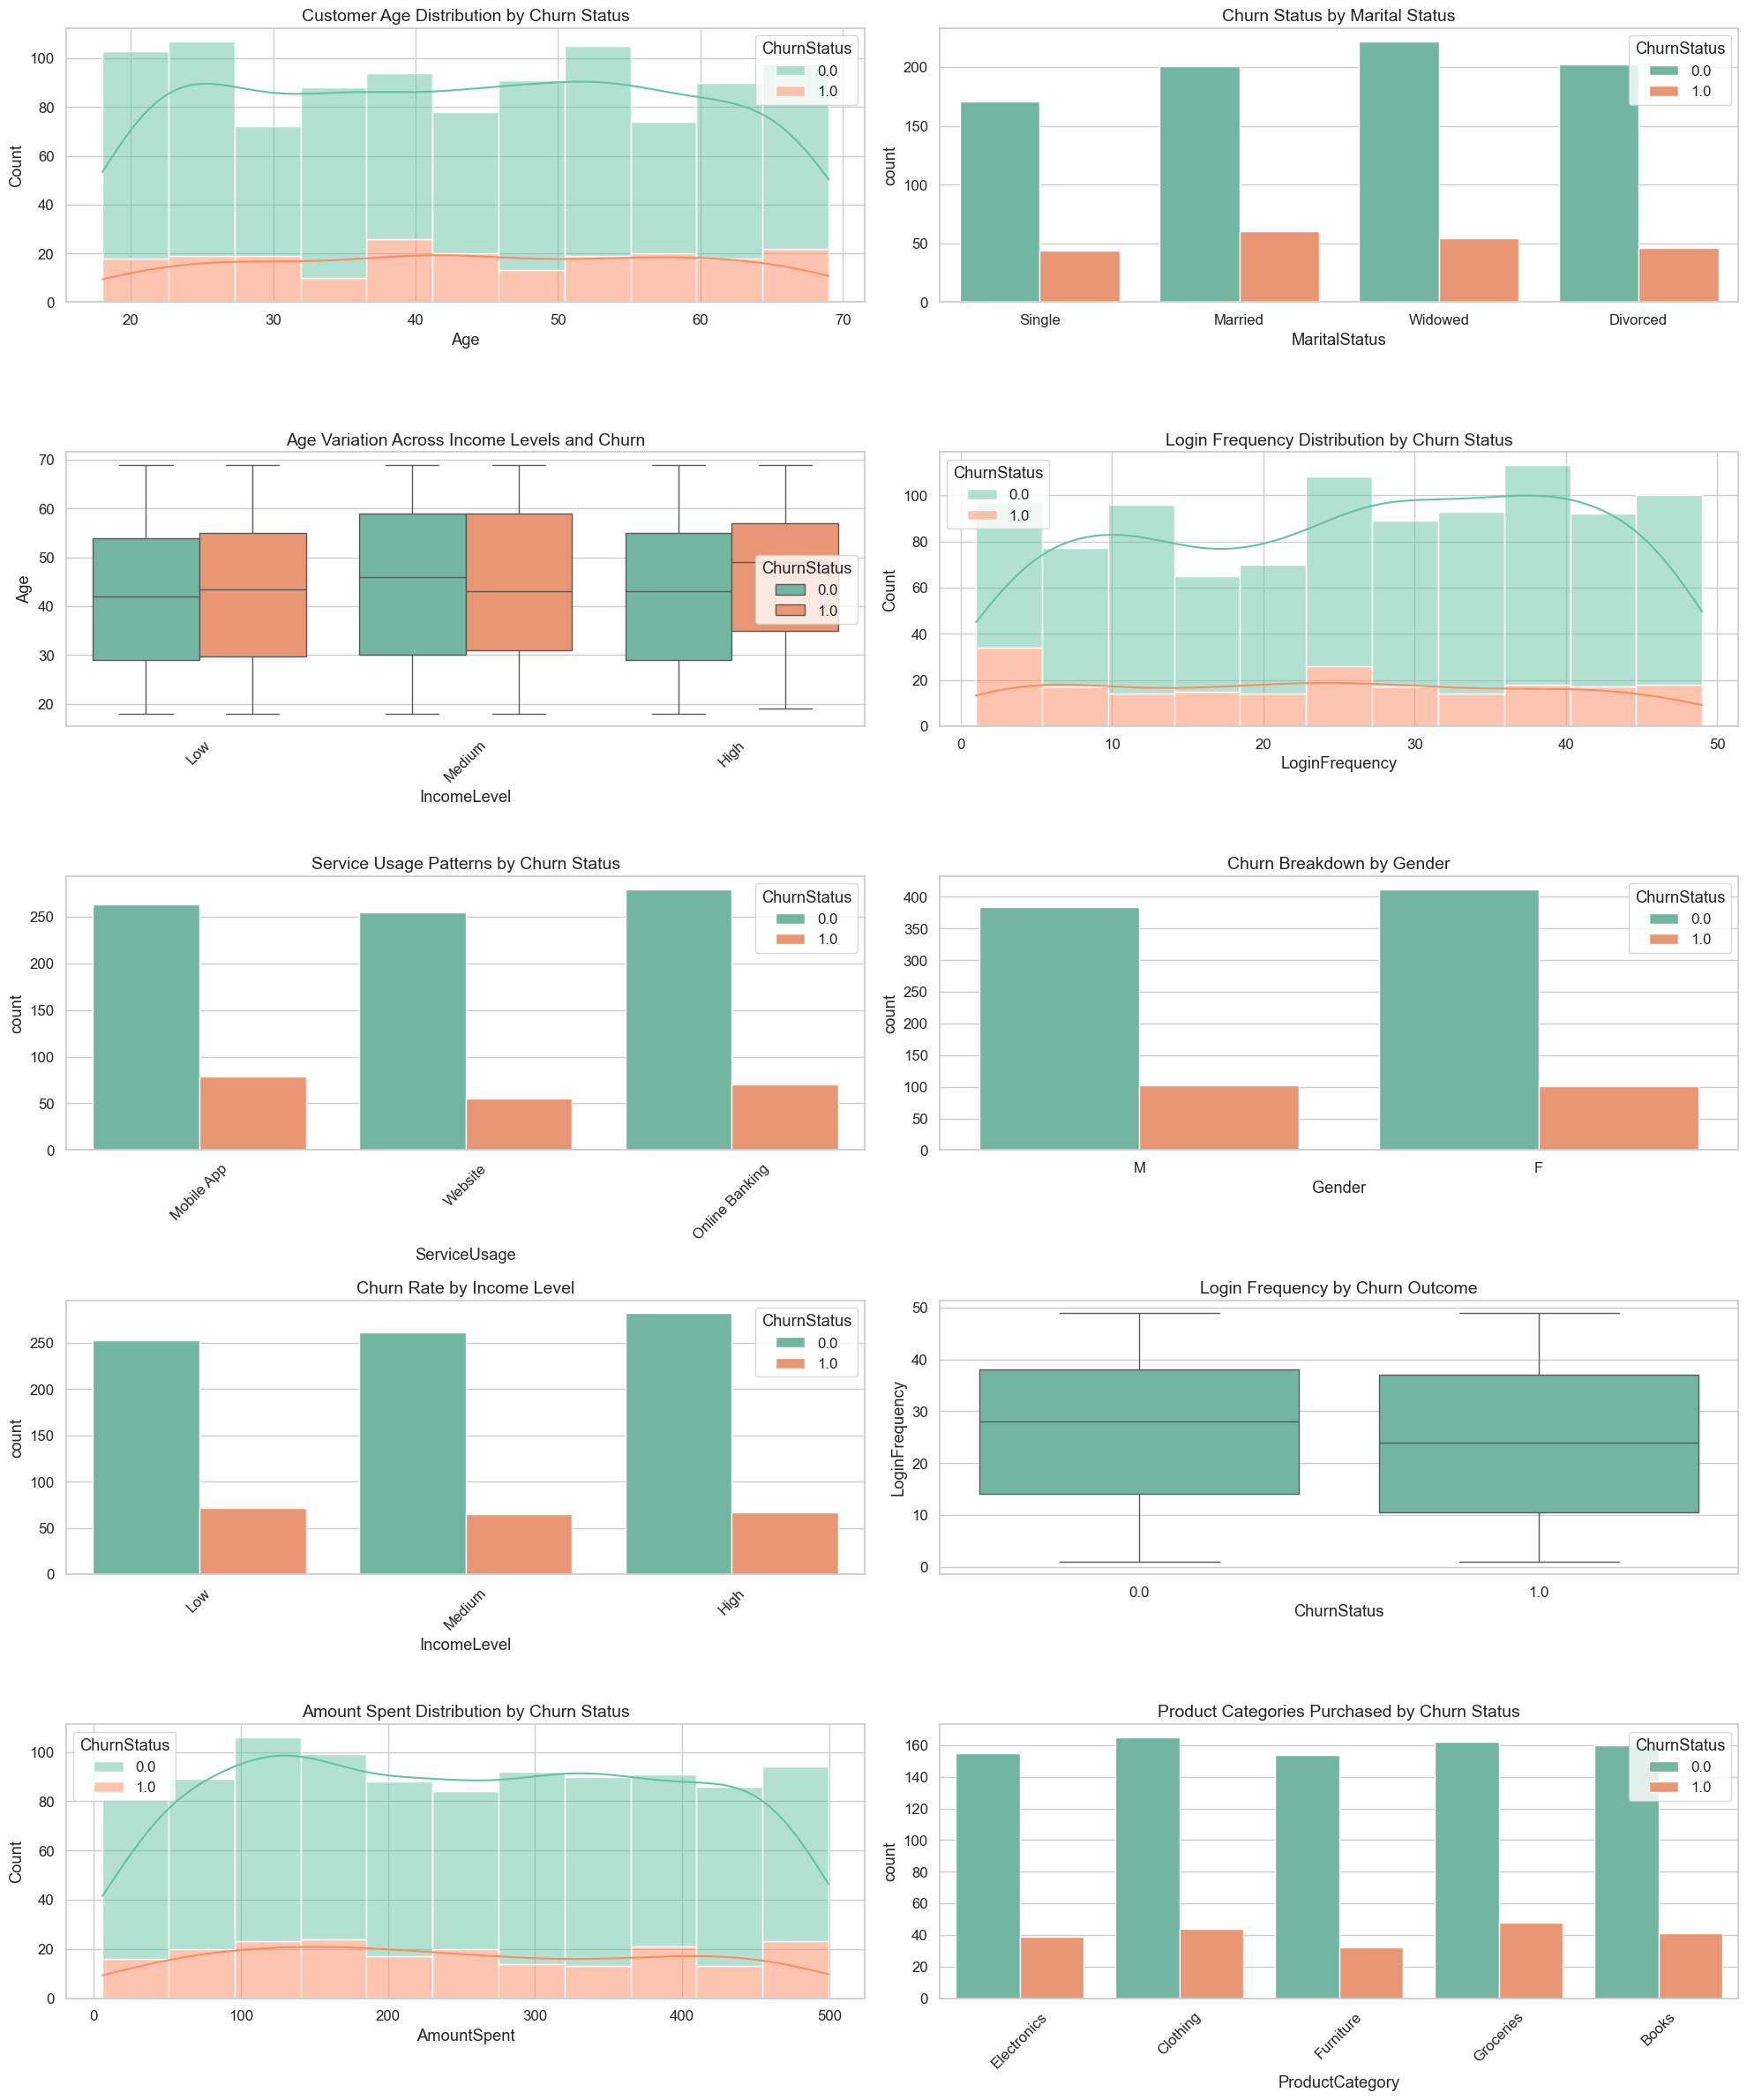

In [22]:
# Configure Seaborn theme and matplotlib layout
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)
fig, axs = plt.subplots(5, 2, figsize=(20, 24))
axs = axs.flatten()
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Distribution of customer age, segmented by churn status
sns.histplot(data=filtered_data, x="Age", kde=True, hue="ChurnStatus", multiple="stack", ax=axs[0])
axs[0].set_title("Customer Age Distribution by Churn Status", fontsize=14)

# Marital status distribution among customers, split by churn outcome
sns.countplot(data=filtered_data, x="MaritalStatus", hue="ChurnStatus", ax=axs[1])
axs[1].set_title("Churn Status by Marital Status", fontsize=14)

# Age vs income level with churn status as grouping variable
sns.boxplot(data=filtered_data, x="IncomeLevel", y="Age", hue="ChurnStatus", ax=axs[2])
axs[2].set_title("Age Variation Across Income Levels and Churn", fontsize=14)
axs[2].tick_params(axis='x', rotation=45)

# Frequency of logins distribution, stratified by churn status
sns.histplot(data=filtered_data, x="LoginFrequency", kde=True, hue="ChurnStatus", multiple="stack", ax=axs[3])
axs[3].set_title("Login Frequency Distribution by Churn Status", fontsize=14)

# Service usage types and how they relate to churn
sns.countplot(data=filtered_data, x="ServiceUsage", hue="ChurnStatus", ax=axs[4])
axs[4].set_title("Service Usage Patterns by Churn Status", fontsize=14)
axs[4].tick_params(axis='x', rotation=45)

# Gender-based churn comparison
sns.countplot(data=filtered_data, x="Gender", hue="ChurnStatus", ax=axs[5])
axs[5].set_title("Churn Breakdown by Gender", fontsize=14)

# Income levels and corresponding churn frequency
sns.countplot(data=filtered_data, x="IncomeLevel", hue="ChurnStatus", ax=axs[6])
axs[6].set_title("Churn Rate by Income Level", fontsize=14)
axs[6].tick_params(axis='x', rotation=45)

# Variation in login frequency across churn outcomes
sns.boxplot(data=filtered_data, x="ChurnStatus", y="LoginFrequency", ax=axs[7])
axs[7].set_title("Login Frequency by Churn Outcome", fontsize=14)

# Spending behavior distribution based on churn status
sns.histplot(data=filtered_data, x="AmountSpent", kde=True, hue="ChurnStatus", multiple="stack", ax=axs[8])
axs[8].set_title("Amount Spent Distribution by Churn Status", fontsize=14)

# Popular product categories among churned vs retained customers
sns.countplot(data=filtered_data, x="ProductCategory", hue="ChurnStatus", ax=axs[9])
axs[9].set_title("Product Categories Purchased by Churn Status", fontsize=14)
axs[9].tick_params(axis='x', rotation=45)

# Final layout adjustments for clarity
plt.tight_layout()
plt.show()


## 🔧 Data Cleaning and Preprocessing

Before proceeding with any analysis or modeling, it's critical to ensure the dataset is clean, consistent, and suitable for interpretation. The following steps were performed during the preprocessing phase:

- **Missing Value Handling**  
  Identified and addressed missing values in key columns using appropriate strategies (e.g., imputation, removal, or flagging).

- **Data Type Correction**  
  Ensured that each column had the correct data type (e.g., converting numeric-looking strings to floats, categoricals to `category` dtype).

- **Encoding Categorical Variables**  
  Transformed categorical features (such as `Gender`, `MaritalStatus`, `ServiceUsage`) into numerical formats using label encoding or one-hot encoding, enabling them to be used in statistical modeling.

- **Outlier Detection and Treatment**  
  Detected extreme values in features like `AmountSpent` and `LoginFrequency`. Outliers were either capped, transformed, or retained based on business logic and distribution impact.

- **Feature Engineering**  
  Created meaningful new variables where necessary (e.g., binning continuous features like `Age` into age groups), helping enhance predictive power.

- **Standardization and Scaling (if applicable)**  
  Numerical features were scaled (e.g., with `StandardScaler` or `MinMaxScaler`) to normalize ranges, especially for models sensitive to scale.

These preprocessing steps ensure the data quality is robust enough for exploratory analysis, visualization, and machine learning applications.


In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [24]:
# 1. Drop rows with missing ChurnStatus
filtered_data = filtered_data[filtered_data['ChurnStatus'].notnull()]

# 2. Missing Value Handling
#    - Numerical: Impute with median
num_cols = ['Age', 'AmountSpent', 'LoginFrequency']
num_imputer = SimpleImputer(strategy='median')
filtered_data[num_cols] = num_imputer.fit_transform(filtered_data[num_cols])

#    - Categorical: Impute with most frequent
cat_cols = ['Gender', 'MaritalStatus', 'ServiceUsage', 'IncomeLevel', 'ProductCategory', 'InteractionType', 'ResolutionStatus']
cat_imputer = SimpleImputer(strategy='most_frequent')
filtered_data[cat_cols] = cat_imputer.fit_transform(filtered_data[cat_cols])

In [25]:


# 4. Encoding Categorical Variables
#    - Label encode binary categories
binary_cols = ['Gender']
le = LabelEncoder()
for col in binary_cols:
    filtered_data[col] = le.fit_transform(filtered_data[col])

#    - One-hot encode multi-class categories
multi_cols = ['MaritalStatus', 'ServiceUsage', 'IncomeLevel', 'ProductCategory']
filtered_data = pd.get_dummies(filtered_data, columns=multi_cols, drop_first=True)

# 5. Outlier Detection & Treatment
#    - Cap AmountSpent at 99th percentile
upper_limit = filtered_data['AmountSpent'].quantile(0.99)
filtered_data['AmountSpent'] = np.where(filtered_data['AmountSpent'] > upper_limit, upper_limit, filtered_data['AmountSpent'])

#    - Log-transform LoginFrequency to reduce skew
filtered_data['LoginFrequency_log'] = np.log1p(filtered_data['LoginFrequency'])

# 6. Feature Engineering
#    - Bin Age into groups
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
filtered_data['AgeGroup'] = pd.cut(filtered_data['Age'], bins=age_bins, labels=age_labels)

# 7. Standardization & Scaling
scaler = StandardScaler()
filtered_data[['Age', 'AmountSpent', 'LoginFrequency_log']] = scaler.fit_transform(
    filtered_data[['Age', 'AmountSpent', 'LoginFrequency_log']]
)

# Final check
print(filtered_data.info())
print(filtered_data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Age                          1000 non-null   float64 
 1   Gender                       1000 non-null   int64   
 2   TransactionDate              1000 non-null   object  
 3   AmountSpent                  1000 non-null   float64 
 4   InteractionDate              1000 non-null   object  
 5   InteractionType              1000 non-null   object  
 6   ResolutionStatus             1000 non-null   object  
 7   LastLoginDate                1000 non-null   object  
 8   LoginFrequency               1000 non-null   float64 
 9   ChurnStatus                  1000 non-null   float64 
 10  MaritalStatus_Married        1000 non-null   bool    
 11  MaritalStatus_Single         1000 non-null   bool    
 12  MaritalStatus_Widowed        1000 non-null   bool    
 13  ServiceUs

# ---  The cleaned and preprocessed data set ready for model building ---

In [26]:
print("Final shape of the cleaned data:", filtered_data.shape)
# Show the cleaned and preprocessed data
filtered_data.head(20)

Final shape of the cleaned data: (1000, 23)


,Age,Gender,TransactionDate,AmountSpent,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ChurnStatus,...,ServiceUsage_Online Banking,ServiceUsage_Website,IncomeLevel_Low,IncomeLevel_Medium,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Groceries,LoginFrequency_log,AgeGroup
0,1.229628,1,2022-03-27,1.154546,2022-03-31,Inquiry,Resolved,2023-10-21,34.0,0.0,...,False,False,True,False,False,True,False,False,0.625351,55-64
1,1.426547,1,2022-08-08,-1.397319,2022-03-17,Inquiry,Resolved,2023-12-05,5.0,1.0,...,False,True,True,False,True,False,False,False,-1.666656,55-64
2,-1.658518,1,2022-07-25,-0.391226,2022-08-24,Inquiry,Resolved,2023-11-15,3.0,0.0,...,False,True,True,False,False,True,False,False,-2.193609,NaN
3,-1.461599,1,2022-01-25,-1.070166,2022-11-18,Inquiry,Resolved,2023-08-25,2.0,0.0,...,False,True,True,False,False,False,True,False,-2.567488,18-24
4,-1.461599,1,2022-07-24,1.019521,2022-07-03,Inquiry,Unresolved,2023-10-27,41.0,0.0,...,False,True,False,True,True,False,False,False,0.862301,18-24
5,0.901430,0,2022-01-09,0.227859,2022-05-05,Feedback,Resolved,2023-09-17,2.0,0.0,...,False,True,False,True,False,True,False,False,-2.567488,55-64
6,-1.067761,0,2022-09-16,0.412293,2022-04-29,Inquiry,Unresolved,2023-01-07,32.0,0.0,...,False,False,False,False,False,True,False,False,0.548880,25-34
7,-0.411364,1,2022-11-19,-0.375486,2022-09-13,Feedback,Unresolved,2023-04-22,17.0,1.0,...,True,False,True,False,False,False,False,True,-0.238870,35-44
8,-0.280085,1,2022-10-08,-0.083765,2022-08-15,Inquiry,Resolved,2023-06-27,24.0,0.0,...,False,True,False,False,False,False,False,False,0.188063,35-44
9,1.623466,1,2022-08-15,-1.424776,2022-10-28,Feedback,Resolved,2023-01-13,29.0,1.0,...,True,False,False,False,True,False,False,False,0.425013,65+


## Task 2: Building a machine learning model

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameters: {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 100}
Train ROC-AUC: 1.000
Test  ROC-AUC: 1.000

Classification Report:
               precision    recall  f1-score   support

 Not Churned       1.00      1.00      1.00       159
     Churned       1.00      1.00      1.00        41

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[159   0]
 [  0  41]]


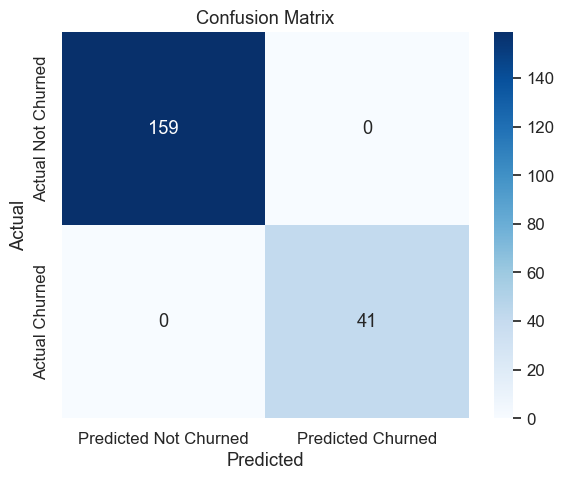

In [28]:
# 2. Separate features and target
X = filtered_data.drop('ChurnStatus', axis=1)
y = filtered_data['ChurnStatus']

# 3. Select only numeric columns for X (drop dates/objects)
X = filtered_data.select_dtypes(include=[np.number]).copy()
#    If you have engineered date features (e.g. year/month), they would already be numeric here.

# 4. Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# 5. Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 6. Set up Random Forest with hyperparameter grid
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 10, None],
    'class_weight': ['balanced']
}
rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    error_score='raise'          # fail immediately if there’s a data issue
)

# 7. Train & tune
grid.fit(X_train, y_train)

# 8. Best model performance
best_model = grid.best_estimator_
print("Best hyperparameters:", grid.best_params_)

train_auc = roc_auc_score(y_train, best_model.predict_proba(X_train)[:,1])
test_auc  = roc_auc_score(y_test,  best_model.predict_proba(X_test)[:,1])
print(f"Train ROC-AUC: {train_auc:.3f}")
print(f"Test  ROC-AUC: {test_auc:.3f}")

# 9. Classification report and confusion matrix
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Not Churned','Churned']))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 10. Optional: plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Predicted Not Churned','Predicted Churned'],
    yticklabels=['Actual Not Churned','Actual Churned']
)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()